#Problem 3: Hough Transform

#line fitting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab.patches import cv2_imshow

In [4]:
import numpy
import matplotlib.pyplot
import cv2

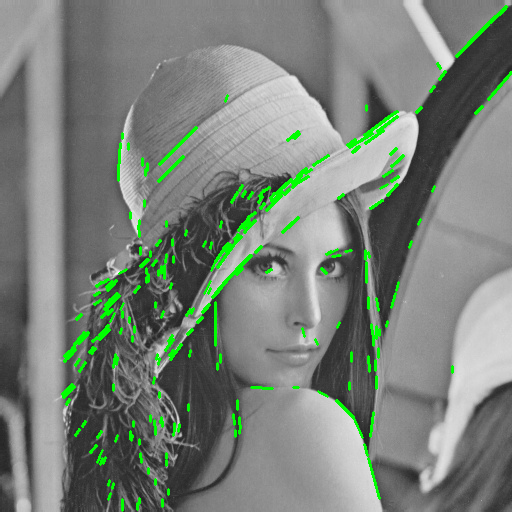

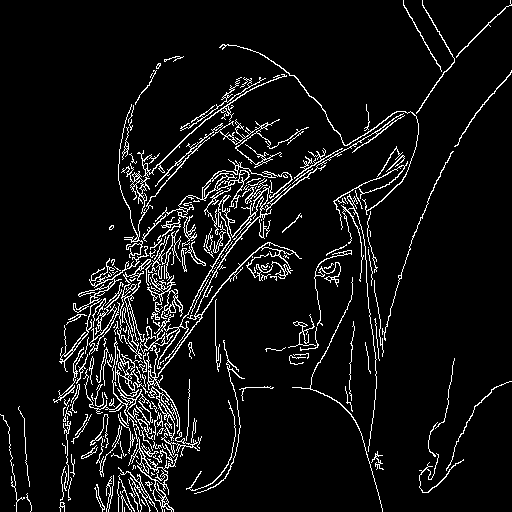

In [5]:
I = cv2.imread('/content/drive/MyDrive/D22180_HW_3/lena.jpg')
G_I = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY) #Gray scale conversion
E = cv2.Canny(G_I,50,200,apertureSize = 3) #E= edge dtection 
Min_Line_Length = 10
Max_Line_Gap = 5

# probabilistic Hough transform
L = cv2.HoughLinesP(E,1,numpy.pi/180,50,Min_Line_Length,Max_Line_Gap) #L=Lines
for l1 in L:
   for x1,y1,x2,y2 in l1:
      cv2.line(I,(x1,y1),(x2,y2),(0,255,0),2)
cv2_imshow(I)
cv2_imshow(E)

#circle Fitting

In [6]:
B = cv2.imread('/content/drive/MyDrive/D22180_HW_3/fg1.jpg', cv2.IMREAD_COLOR)

In [7]:
G_I = cv2.cvtColor(B,cv2.COLOR_BGR2GRAY) #binary to gray conversion

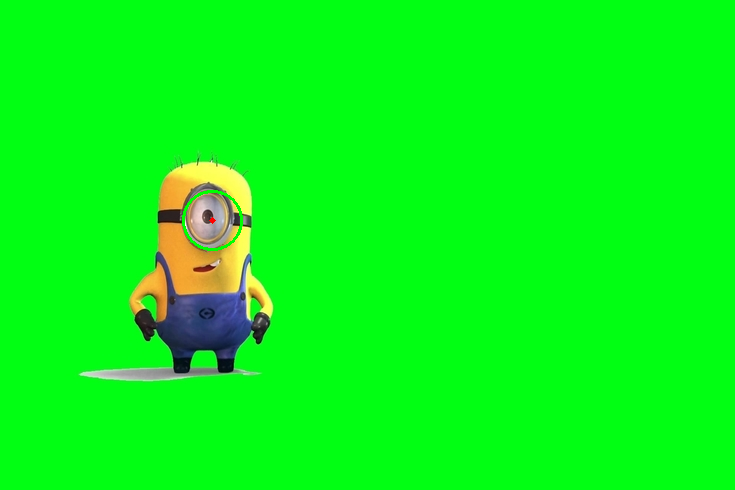

In [8]:
G_B = cv2.blur(G_I, (3, 3)) # blur image by 3*3 kernal
Circle_Detection = cv2.HoughCircles(G_B, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 1, maxRadius = 40)
if Circle_Detection is not None:
	Circle_Detection = numpy.uint16(numpy.around(Circle_Detection))
	for i in Circle_Detection[0, :]:
		x1, x2,R = i[0], i[1], i[2]
		cv2.circle(B, (x1,  x2), R, (0, 255, 0), 2)
	cv2.circle(B, (x1, x2), 1, (0, 0, 255), 3)
cv2_imshow(B)
